<h1 align=center><font size = 5>Car Price prediction Using Machine Learning</font></h1>
<h1 align=center><font size = 4>By</font></h1>
<h1 align=center><font size = 4>Norman Angel Agong</font></h1>
<h1 align=center><font size = 4>anormanangel@gmail.com</font></h1>
</font></h1>

### Problem statement

To develop a car price predition model.

## Machine learning  Development Cycle

1. Problem Defination
2. Data Collection
3. Data cleaning and Preprocessing
4. Feature Engineering and Selection
5. EDA
6. Model selection
7. Evaluation Model
8. Model Deployment

In [3]:
#Import Packages

import pandas as pd
import numpy  as np

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read 

df = pd.read_csv('https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/main/ford.csv')

In [5]:
# shape

rows , columns = df.shape

print(f'No of rows : {rows}\nNo of Columns :{columns}')

No of rows : 17966
No of Columns :9


In [6]:
# display a sample of 3 rows

df.sample(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6827,Fiesta,2018,9990,Manual,46240,Petrol,145,56.5,1.0
12387,Grand C-MAX,2016,10800,Manual,33212,Diesel,30,64.2,1.5
9750,B-MAX,2015,8500,Manual,27501,Petrol,30,57.7,1.0


### Data Cleaning

 - Detect and Treat Missing Nos
 - Outlier Detection and Handling
 - Dealing with Duplicates
 - Handling Inconsistent Data
 - Dealing with Data Redundancy
 - Handling Inconsistent Naming Conventions
 - Data Formating
 

In [7]:
# Check the format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


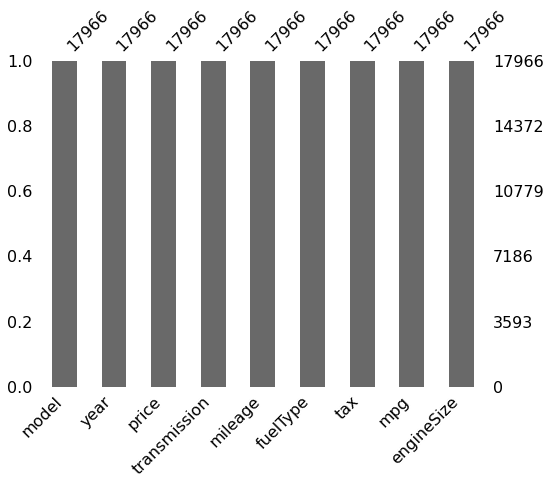

In [10]:
# check for missing Nos

import missingno as mn

# Assuming df is your DataFrame
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the values (width, height) as needed
mn.bar(df, ax=ax)

# Show the plot
plt.show()

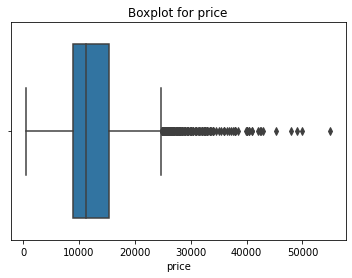

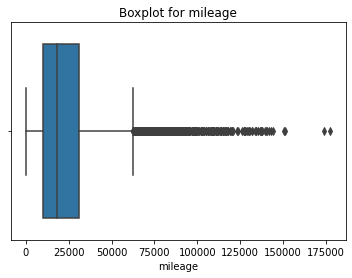

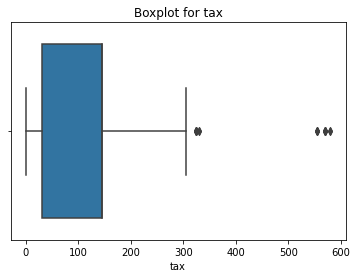

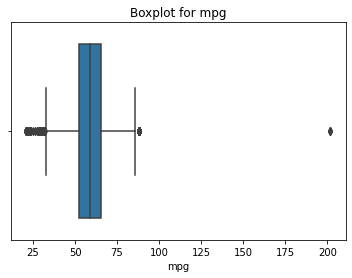

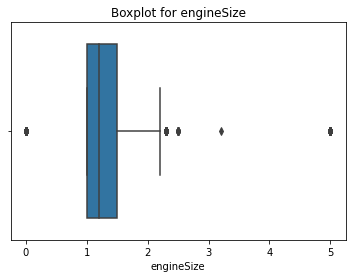

In [11]:
# Check the s
numerical_columns = df.select_dtypes(include=['float', 'int']).columns.tolist()

# Loop through numerical columns
for col in numerical_columns:
    # Exclude 'year' from box plots
    if col != 'year':
        # Create a box plot
        sns.boxplot(x=df[col])
        
        # Set title and labels
        plt.title(f'Boxplot for {col}')
        plt.xlabel(col)
        
        # Display the plot
        plt.show()

In [ ]:
# # Function to Treat Outliers

# def treat_outliers_with_iqr(df, numerical_columns):
#     for col in numerical_columns:
#         # Exclude 'year' from box plots
#         if col != 'year':
#             # Calculate the IQR for the column
#             Q1 = df[col].quantile(0.25)
#             Q3 = df[col].quantile(0.75)
#             IQR = Q3 - Q1

#             # Define the lower and upper bounds for outliers
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR

#             # Identify outliers
#             outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

#             # Replace outliers with NaN (you can choose a different treatment method)
#             df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound))

#             # Create a box plot after treating outliers
#             sns.boxplot(x=df[col])

#             # Set title and labels
#             plt.title(f'Boxplot for {col} (Outliers Treated)')
#             plt.xlabel(col)

#             # Display the plot
#             plt.show()


## Exploratory Data Analysis

In [12]:
# Summary statistics
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [13]:
df.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0


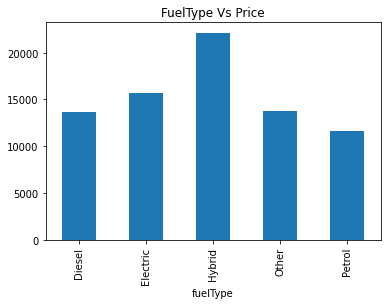

In [14]:
# Fuel Type Vs Mean  Price

df.groupby('fuelType')['price'].mean().plot(kind='bar',title='FuelType Vs Price');

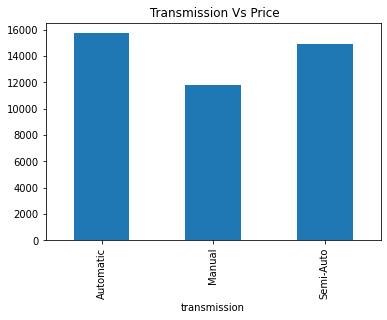

In [15]:
# Transmission Vs Price
df.groupby('transmission')['price'].mean().plot(kind='bar',title=' Transmission Vs Price');

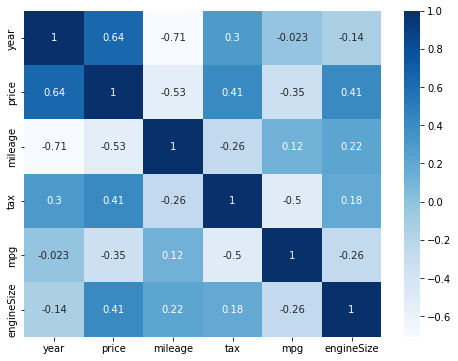

In [16]:
#Correlation

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method='pearson'), cmap='Blues', annot=True);

## Feature Engineering

In [17]:
# Encoding

#Check the cardinality

for col in df.columns:
    print(f'Unique Values of col {col} is {df[col].nunique()}')

Unique Values of col model is 24
Unique Values of col year is 23
Unique Values of col price is 3511
Unique Values of col transmission is 3
Unique Values of col mileage is 13528
Unique Values of col fuelType is 5
Unique Values of col tax is 36
Unique Values of col mpg is 90
Unique Values of col engineSize is 16


In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()

In [19]:
categorical_cols

['model', 'transmission', 'fuelType']

In [20]:
df['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [21]:
onehot_encoded_df = pd.get_dummies(df, columns=categorical_cols )
onehot_encoded_df.head(3)
data = onehot_encoded_df

#### Split the data for training

In [23]:
y = data['price']

X= data.drop(columns=['price'])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Train the model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [26]:
# Define a list of regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    SVR(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
]

# Dictionary to store models and their performance
model_results = {}

# Loop through each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    model_name = type(model).__name__
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Save model and performance in the dictionary
    model_results[model_name] = {
        'model': model,
        'rmse': rmse,
    }

    print(f"{model_name} - Root Mean Squared Error: {rmse}")

LinearRegression - Root Mean Squared Error: 1858.7608726633384
DecisionTreeRegressor - Root Mean Squared Error: 1570.138881151207
RandomForestRegressor - Root Mean Squared Error: 1256.0364098568036
SVR - Root Mean Squared Error: 4458.743003793507
KNeighborsRegressor - Root Mean Squared Error: 3709.282588987233
GradientBoostingRegressor - Root Mean Squared Error: 1365.3731340416646


In [27]:
# Extract the best two models

top_models = sorted(model_results.items(), key=lambda x: x[1]['rmse'])[:3]
top_models

[('RandomForestRegressor',
  {'model': RandomForestRegressor(random_state=42),
   'rmse': 1256.0364098568036}),
 ('GradientBoostingRegressor',
  {'model': GradientBoostingRegressor(), 'rmse': 1365.3731340416646}),
 ('DecisionTreeRegressor',
  {'model': DecisionTreeRegressor(random_state=42),
   'rmse': 1570.138881151207})]

NB. The Root Mean Squared Error (RMSE) is a measure of the average deviation between predicted and actual values

### Save the Model

In [28]:
import joblib

for i, (model_name, result) in enumerate(top_models, 1):
    model_filename = f'{model_name.lower().replace(" ", "_")}_model_{i}.joblib'
    joblib.dump(result['model'], model_filename)
    print(f"Top Model {i}: {model_name}")
    print(f"RMSE: {result['rmse']}")
    print(f"Saved as: {model_filename}")
    print("---")

Top Model 1: RandomForestRegressor
RMSE: 1256.0364098568036
Saved as: randomforestregressor_model_1.joblib
---
Top Model 2: GradientBoostingRegressor
RMSE: 1365.3731340416646
Saved as: gradientboostingregressor_model_2.joblib
---
Top Model 3: DecisionTreeRegressor
RMSE: 1570.138881151207
Saved as: decisiontreeregressor_model_3.joblib
---
